# Вебинар 5. Обучение без учителя.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 12})

In [11]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [12]:
def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))
    plt.bar(unique, counts)
    plt.xlabel('Clгsters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

In [13]:
def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
    
def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])


def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
   
    
def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, learning_rate=250, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])  

In [14]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels.name, cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(15,10))
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=(15,10))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

    
def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

In [15]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

**Пути к директориям и файлам**

In [5]:
TRAIN_DATASET_PATH = '../datasets/housing_train.csv'
TRAIN_DATASET_EXT_PATH = '../datasets/housing_train_ext.csv'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [6]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.328084,1.052685,0.998343,-0.804819,-0.972476,-0.978955,-0.977033,2.344766,452600.0,0,0,0,1,0
1,-1.323093,1.043321,-0.620471,2.045890,1.357143,0.878259,1.669961,2.332238,358500.0,0,0,0,1,0
2,-1.333076,1.038639,1.888691,-0.535746,-0.827024,-0.823518,-0.843637,1.782699,352100.0,0,0,0,1,0
3,-1.338067,1.038639,1.888691,-0.624215,-0.719723,-0.768132,-0.733781,0.932968,341300.0,0,0,0,1,0
4,-1.338067,1.038639,1.888691,-0.462404,-0.612423,-0.761878,-0.629157,-0.012881,342200.0,0,0,0,1,0


In [9]:
df.shape

(20640, 14)

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
dtype: object

### Определение признакового пространства

In [8]:
df_features = df.drop('median_house_value', axis=1)
df_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.328084,1.052685,0.998343,-0.804819,-0.972476,-0.978955,-0.977033,2.344766,0,0,0,1,0
1,-1.323093,1.043321,-0.620471,2.045890,1.357143,0.878259,1.669961,2.332238,0,0,0,1,0
2,-1.333076,1.038639,1.888691,-0.535746,-0.827024,-0.823518,-0.843637,1.782699,0,0,0,1,0
3,-1.338067,1.038639,1.888691,-0.624215,-0.719723,-0.768132,-0.733781,0.932968,0,0,0,1,0
4,-1.338067,1.038639,1.888691,-0.462404,-0.612423,-0.761878,-0.629157,-0.012881,0,0,0,1,0


### Понижение размерности: PCA

**Как работает PCA**

<img src="pca_1.png">

**Снижение размерности до 2х компонент**

In [16]:
components_2d = reduce_dims_to_2D_space_with_PCA(df_features)

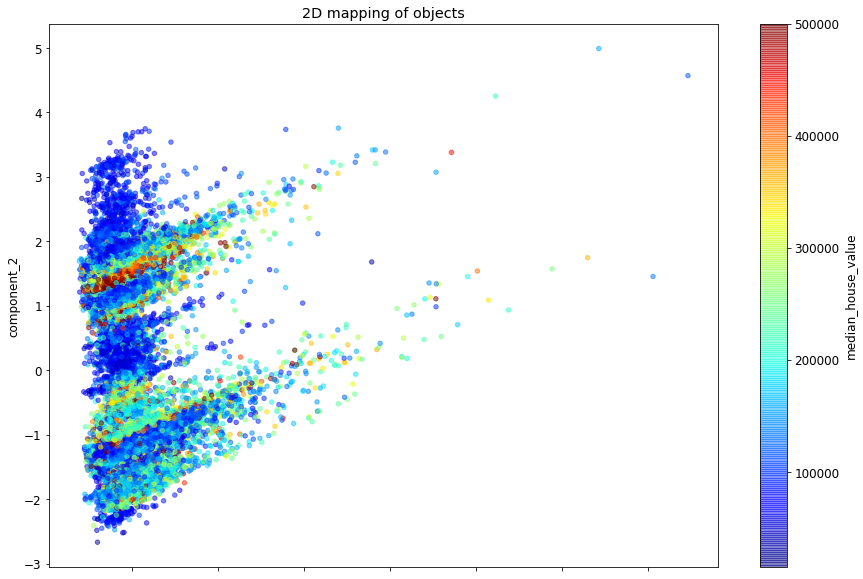

In [17]:
display_components_in_2D_space(components_2d, df['median_house_value'])

**Снижение размерности до 3х компонент**

In [18]:
components_3d = reduce_dims_to_3D_space_with_PCA(df_features)

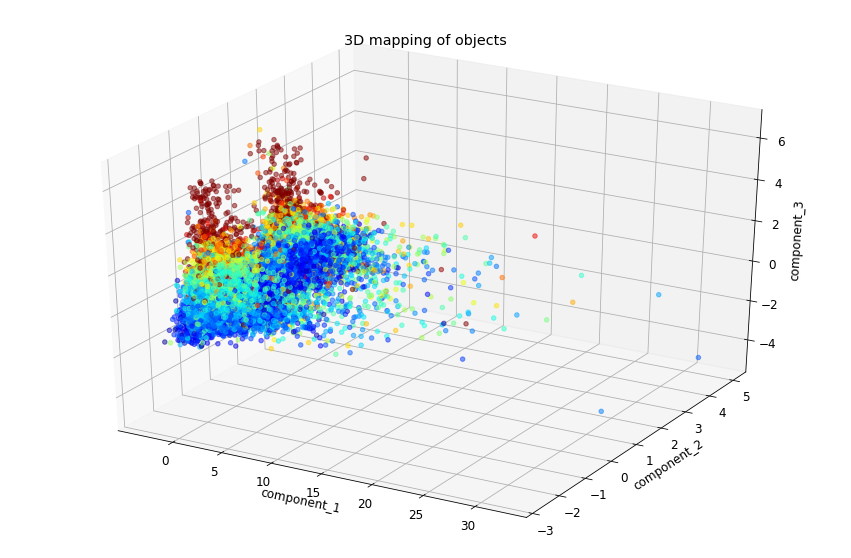

In [19]:
display_components_in_3D_space(components_3d, df['median_house_value'])

### Кластеризация: k-means

<img src="kmeans_v1.gif">

### Оценка оптимального количества кластеров методом "Локтя"

- Измеряется отношение внутрикластерного расстояния к межкластерному расстоянию для разного количества кластеров.  
- Когда это отношение перестаёт резко уменьшаться, полагаем, что дальше дробить пространство примеров на кластеры не имеет смысла.

<img src="kmeans_v2.gif">

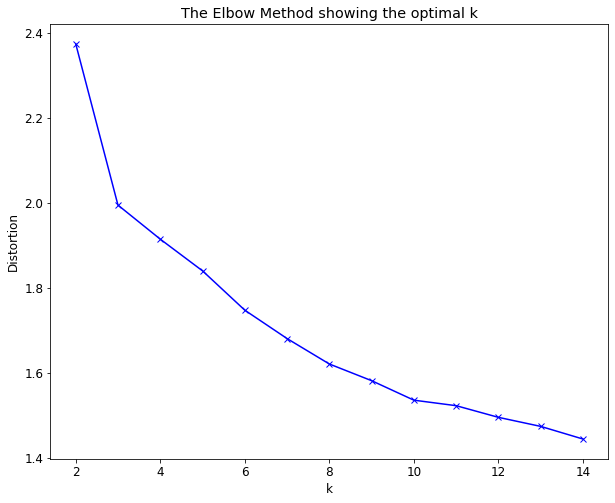

In [20]:
apply_elbow_method(df_features)

**Выделение 2 кластеров**

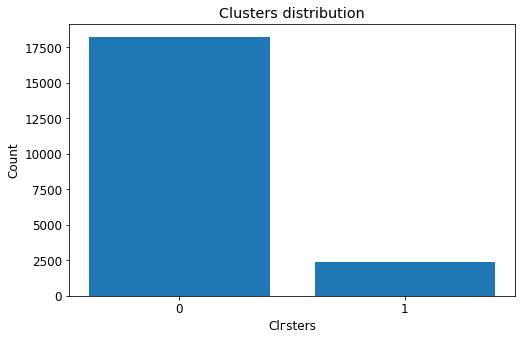

In [21]:
kmeans_2 = KMeans(n_clusters=2, random_state=33)
labels_clast_2 = kmeans_2.fit_predict(df_features)
labels_clast_2 = pd.Series(labels_clast_2, name='clusters_2')

unique, counts = np.unique(labels_clast_2, return_counts=True)
display_clusters_distribution(unique, counts)

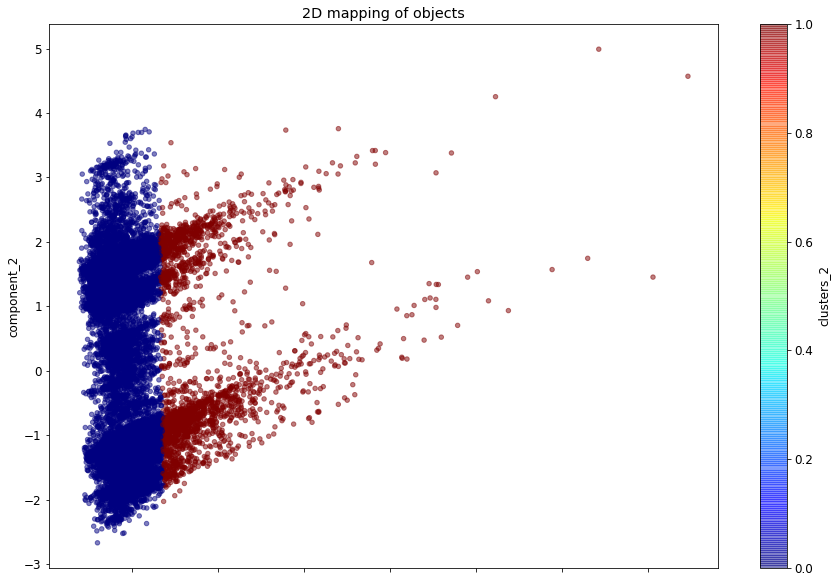

In [22]:
display_components_in_2D_space(components_2d, labels_clast_2)

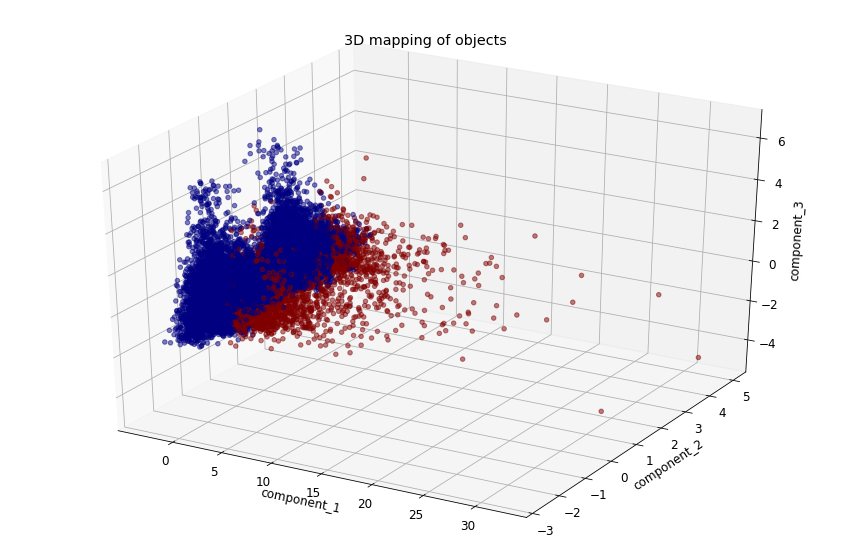

In [23]:
display_components_in_3D_space(components_3d, labels_clast_2)

**Выделение 3 кластеров**

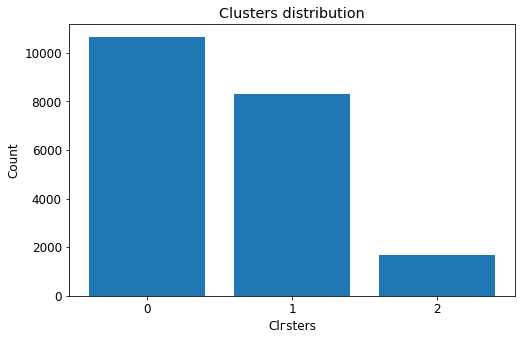

In [24]:
kmeans_3 = KMeans(n_clusters=3, random_state=33)
labels_clast_3 = kmeans_3.fit_predict(df_features)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

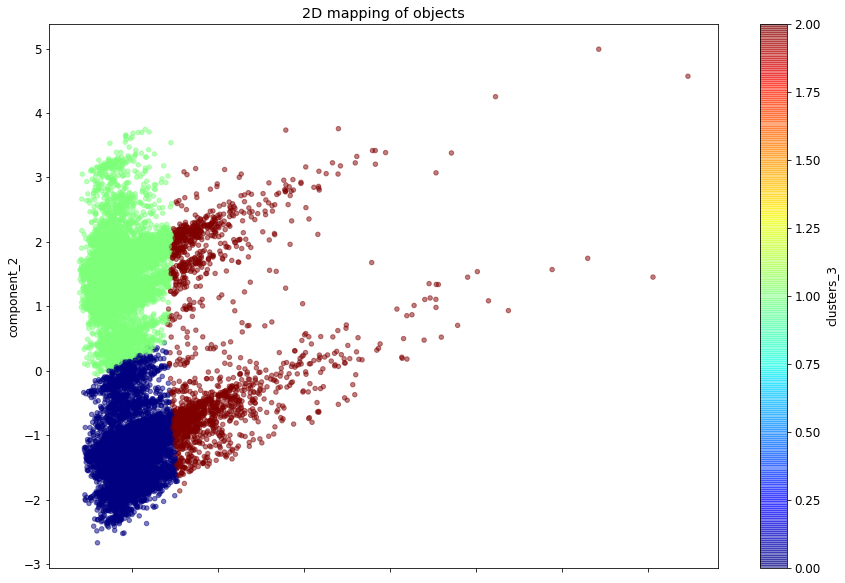

In [25]:
display_components_in_2D_space(components_2d, labels_clast_3)

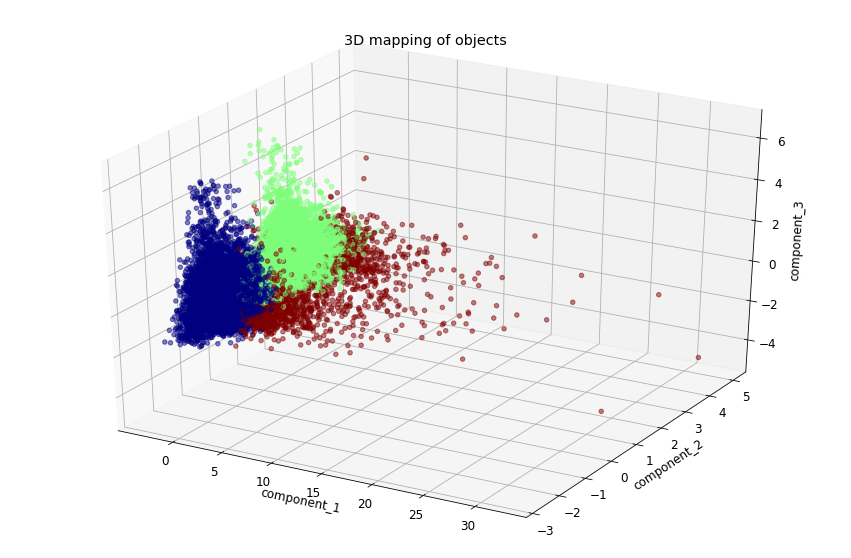

In [26]:
display_components_in_3D_space(components_3d, labels_clast_3)

**Выделение 10 кластеров**

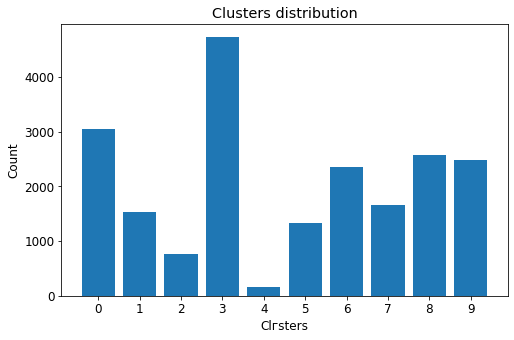

In [27]:
kmeans_10 = KMeans(n_clusters=10, random_state=33)
labels_clast_10 = kmeans_10.fit_predict(df_features)
labels_clast_10 = pd.Series(labels_clast_10, name='clusters_10')

unique, counts = np.unique(labels_clast_10, return_counts=True)
display_clusters_distribution(unique, counts)

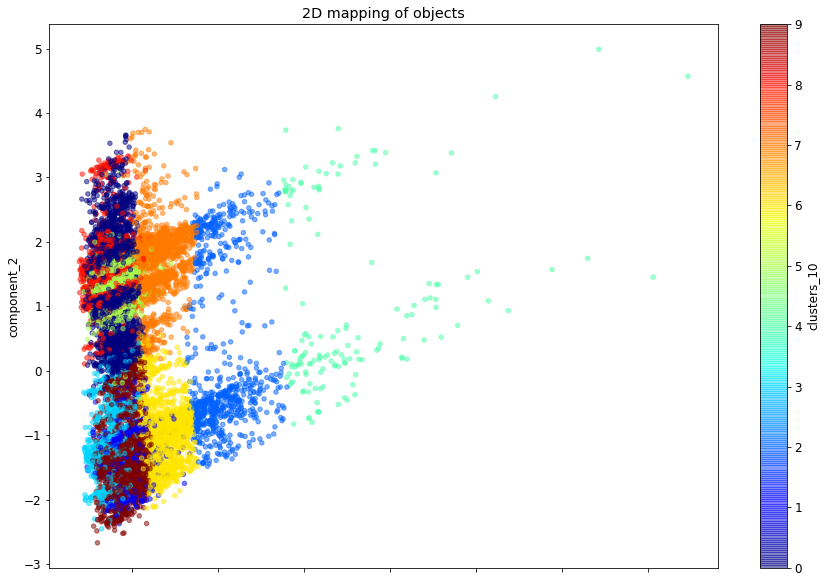

In [28]:
display_components_in_2D_space(components_2d, labels_clast_10)

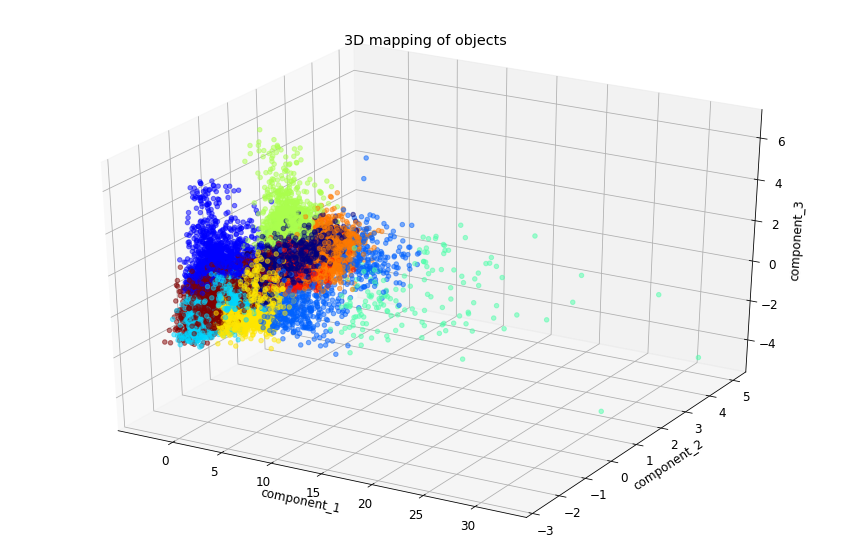

In [29]:
display_components_in_3D_space(components_3d, labels_clast_10)

### Добавление новых признаков

In [30]:
clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=True, prefix='clusters_3')
clusters_10_dummies = pd.get_dummies(labels_clast_10, drop_first=True, prefix='clusters_10')

df_ext = pd.concat([df_features, components_3d, clusters_3_dummies, clusters_10_dummies, df['median_house_value']], 
                   axis=1)

df_ext.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,...,clusters_10_1,clusters_10_2,clusters_10_3,clusters_10_4,clusters_10_5,clusters_10_6,clusters_10_7,clusters_10_8,clusters_10_9,median_house_value
0,-1.328084,1.052685,0.998343,-0.804819,-0.972476,-0.978955,-0.977033,2.344766,0,0,...,0,0,0,0,1,0,0,0,0,452600.0
1,-1.323093,1.043321,-0.620471,2.045890,1.357143,0.878259,1.669961,2.332238,0,0,...,0,0,0,0,0,0,1,0,0,358500.0
2,-1.333076,1.038639,1.888691,-0.535746,-0.827024,-0.823518,-0.843637,1.782699,0,0,...,0,0,0,0,0,0,0,1,0,352100.0
3,-1.338067,1.038639,1.888691,-0.624215,-0.719723,-0.768132,-0.733781,0.932968,0,0,...,0,0,0,0,0,0,0,1,0,341300.0
4,-1.338067,1.038639,1.888691,-0.462404,-0.612423,-0.761878,-0.629157,-0.012881,0,0,...,0,0,0,0,0,0,0,1,0,342200.0


### Сохранение расширенного обучающего датасета

In [31]:
df_ext.to_csv(TRAIN_DATASET_EXT_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [32]:
X = df_ext.iloc[:, :-1]
y = df_ext.iloc[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Переобучение и оценка финальной модели

In [34]:
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.982
MAE:	11660.974
MSE:	242269762.798


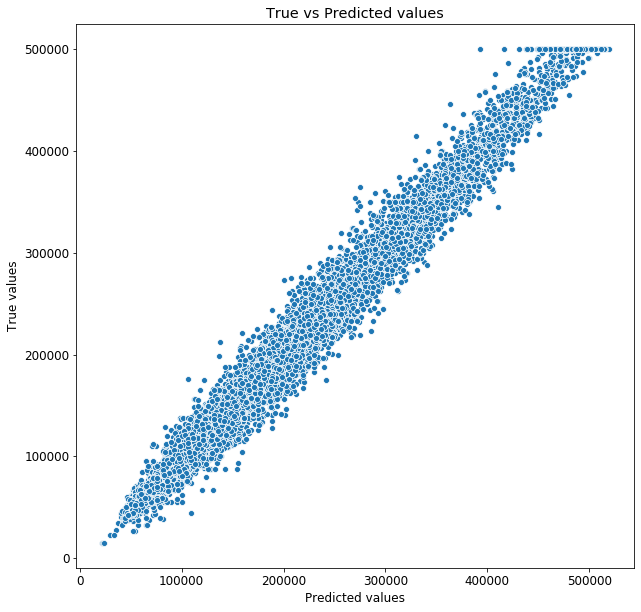

In [35]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.833
MAE:	31154.65
MSE:	2251670602.997


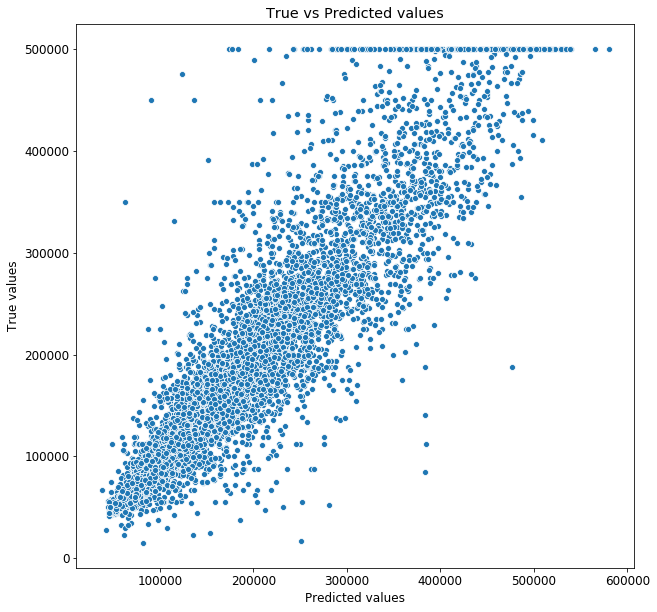

In [36]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [37]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,median_income,0.484225
9,INLAND,0.139825
0,longitude,0.099018
1,latitude,0.088019
2,housing_median_age,0.041715
5,population,0.032734
4,total_bedrooms,0.021354
6,households,0.019561
14,component_2,0.018042
3,total_rooms,0.017851
